<a href="https://colab.research.google.com/github/yeagerca/Cameron-Yeager-Machine-Learning-Projects/blob/main/yeager_Project2_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Function(s)

In [11]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
#Suppress FutureWarning. Source: https://stackoverflow.com/a/46721064
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


# First work-through (cm plot)

X_shape: (569, 30) X_train.shape: (455, 30) X_test.shape: (114, 30) y_train.shape: (455,) y_test.shape: (114,)
clf: LogisticRegression()
y_pred_shape: (114,) y_pred: [1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 1]
Accuracy: 0.9649122807017544


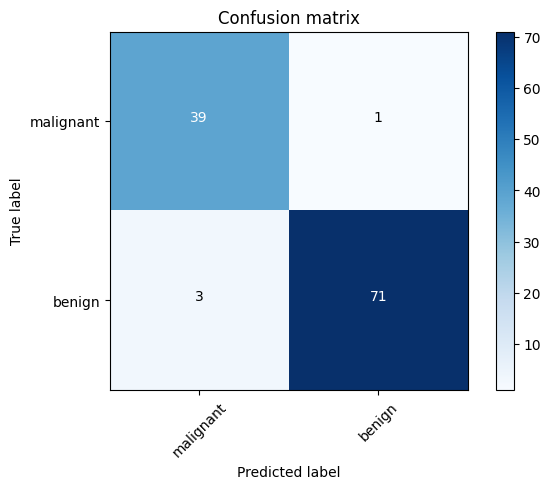

In [13]:
data = pd.read_csv('http://nrvis.com/data/mldata/breast-cancer-wisconsin_wdbc.csv')

X = data.iloc[:, 2:] #Gather all data from column index 2 and onward.
y = data.iloc[:, 1] #Gather data from column index 1.
#Skipping column index 0 because it is irrelevent.

#labels for confusion matrix later
cm_labels = ["malignant", "benign"]

#Where y=='M' (malignant), set to 0, otherwise 1 (benign)
y = np.where(y=='M', 0, 1)

#Scale the data                                               #Test changes here
X = (X - np.mean(X)) / np.std(X) #Standard Normal Distribution (mean 0, std 1)
#X = (X - np.min(X)) / (np.max(X) - np.min(X)) #Normalization

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_shape:", X.shape, "X_train.shape:", X_train.shape, "X_test.shape:",
      X_test.shape, "y_train.shape:", y_train.shape, "y_test.shape:",
      y_test.shape)

#Train the model (Here you should change the hyperparameters)
clf = LogisticRegression() # Create Logistic Regression object
clf.fit(X_train, y_train) # Train Logistic Regression Classifer
print("clf:", clf)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("y_pred_shape:", y_pred.shape, "y_pred:", y_pred)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)                         #Test changes here
plot_confusion_matrix(cm, cm_labels) #normalize=False, normalize=True
plt.show()

# Bulk Testing and Modifying (hyperparameter results)

In [14]:
count = 1000 #used for looping and averaging results later

data = pd.read_csv('http://nrvis.com/data/mldata/breast-cancer-wisconsin_wdbc.csv')
X = data.iloc[:, 2:] #Gather all data from column index 2 and onward.
y = data.iloc[:, 1] #Gather data from column index 1.
cm_labels = ["malignant", "benign"]#labels for confusion matrix later
y = np.where(y=='M', 0, 1)#Where y=='M' set to 0(malignant), else 1(benign)

def doStartSTDNormalDist(X, y):
  X = (X - np.mean(X)) / np.std(X) #Standard Normal Distribution (mean 0, std 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#Split
  return cm_labels, X_train, X_test, y_train, y_test

def doStartNormalized(X, y):
  X = (X - np.min(X)) / (np.max(X) - np.min(X)) #Normalization
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#Split
  return cm_labels, X_train, X_test, y_train, y_test

def doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index):
  clf.fit(X_train, y_train)#Train Logistic Regression Classifer
  y_pred = clf.predict(X_test)#Predict the response for test dataset
  a[index] = accuracy_score(y_test, y_pred)
  return a  #Model Accuracy: how often is the classifier correct?

In [15]:
def stdData(a, index):
  cm_labels, X_train, X_test, y_train, y_test = doStartSTDNormalDist(X, y)
  clf = LogisticRegression() # Create Logistic Regression object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

def normalizedData(a, index):
  cm_labels, X_train, X_test, y_train, y_test = doStartNormalized(X, y)
  clf = LogisticRegression() # Create Logistic Regression object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

In [16]:
index = 0
a = [0] * count
while (count > index):
  a = stdData(a, index)
  index += 1
print("STD Normal Dist:", np.mean(a))

index = 0
a = [0] * count
while (count > index):
  a = normalizedData(a, index)
  index += 1
print("Normalized:", np.mean(a))

#STD Normal Dist: 0.9777631578947368, 0.977640350877193, 0.9770438596491227
#Normalized: 0.9655438596491228, 0.9657631578947369, 0.9644385964912281
#Over 3 runs of 1000 averaged samples...
#Standard Normal Distributed data is slightly more accurate when using the default settings.

STD Normal Dist: 0.9776052631578946
Normalized: 0.9652543859649122


In [17]:
def doSTDDataWithC(a, index, c):
  cm_labels, X_train, X_test, y_train, y_test = doStartNormalized(X, y)
  clf = LogisticRegression(C=c) # Create Logistic Regression object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

In [18]:
index = 0
a = [0] * count
c = 0.0001
while (count > index):
  a = doSTDDataWithC(a, index, c)
  index += 1
print("STD Logistic Regression C=0.0001:", np.mean(a))

index = 0
a = [0] * count
c = 0.001
while (count > index):
  a = doSTDDataWithC(a, index, c)
  index += 1
print("STD Logistic Regression C=0.001:", np.mean(a))

index = 0
a = [0] * count
c = 0.01
while (count > index):
  a = doSTDDataWithC(a, index, c)
  index += 1
print("STD Logistic Regression C=0.01:", np.mean(a))

index = 0
a = [0] * count
c = 0.1
while (count > index):
  a = doSTDDataWithC(a, index, c)
  index += 1
print("STD Logistic Regression C=0.1:", np.mean(a))

index = 0
a = [0] * count
c = 1
while (count > index):
  a = doSTDDataWithC(a, index, c)
  index += 1
print("STD Logistic Regression C=1:", np.mean(a))

index = 0
a = [0] * count
c = 10
while (count > index):
  a = doSTDDataWithC(a, index, c)
  index += 1
print("STD Logistic Regression C=10:", np.mean(a))

#C=100 repeatedly failed to converge, so I stopped testing it.
#/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
#STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
#
#Increase the number of iterations (max_iter) or scale the data as shown in:
#    https://scikit-learn.org/stable/modules/preprocessing.html
#Please also refer to the documentation for alternative solver options:
#    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

#index = 0
#a = [0] * count
#c = 100
#while (count > index):
#  a = doSTDDataWithC(a, index, c)
#  index += 1
#print("STD Logistic Regression C=100:", np.mean(a))


#STD Logistic C=0.0001: 0.6271842105263158, 0.6280526315789474, 0.6256228070175439
#STD Logistic C=0.001: 0.6271052631578947, 0.6262543859649123, 0.6300263157894738
#STD Logistic C=0.01: 0.7704824561403509, 0.7696578947368421, 0.7681929824561403
#STD Logistic C=0.1: 0.9358947368421052, 0.9373421052631579, 0.9372280701754387
#STD Logistic C=1: 0.9651666666666666, 0.9662894736842105, 0.9661491228070177
#STD Logistic C=10: 0.9764210526315787, 0.9757982456140349, 0.9760175438596491
#STD Logistic C=100: Often failed to converge, results thrown out.
#Over 3 runs of 1000 averaged samples...
#C=10 consistantly provided the best accuracy.

STD Logistic Regression C=0.0001: 0.6259473684210527
STD Logistic Regression C=0.001: 0.6264912280701753
STD Logistic Regression C=0.01: 0.7679473684210526
STD Logistic Regression C=0.1: 0.9365701754385964
STD Logistic Regression C=1: 0.965719298245614
STD Logistic Regression C=10: 0.9759298245614034


# Hyperparameter Results condensed

In [19]:
#STD Normal Dist: 0.9777631578947368, 0.977640350877193, 0.9770438596491227
#Normalized: 0.9655438596491228, 0.9657631578947369, 0.9644385964912281
#Over 3 runs of 1000 averaged samples...
#Standard Normal Distributed data is slightly more accurate when using 
#the default settings.

#STD Logistic C=0.0001: 0.6271842105263158, 0.6280526315789474, 0.6256228070175439
#STD Logistic C=0.001: 0.6271052631578947, 0.6262543859649123, 0.6300263157894738
#STD Logistic C=0.01: 0.7704824561403509, 0.7696578947368421, 0.7681929824561403
#STD Logistic C=0.1: 0.9358947368421052, 0.9373421052631579, 0.9372280701754387
#STD Logistic C=1: 0.9651666666666666, 0.9662894736842105, 0.9661491228070177
#STD Logistic C=10: 0.9764210526315787, 0.9757982456140349, 0.9760175438596491
#STD Logistic C=100: Often failed to converge, results thrown out.
#Over 3 runs of 1000 averaged samples...
#C=10 consistantly provided the best accuracy.